In [3]:
import requests
import pandas as pd

url1 = 'https://api.apify.com/v2/datasets/mf3Z9MUGQX7pLQe7n/items?token=apify_api_XIePayhLWdKdnie4nfc2ttXEjxhRBe2z0cal'
url2 = 'https://api.apify.com/v2/datasets/VSptwAMQnJItV5GRv/items?token=apify_api_XIePayhLWdKdnie4nfc2ttXEjxhRBe2z0cal'
url3 = 'https://api.apify.com/v2/datasets/DdwxRgeHgey8jbuMZ/items?token=apify_api_XIePayhLWdKdnie4nfc2ttXEjxhRBe2z0cal'
url4 = 'https://api.apify.com/v2/datasets/bQp6XV9t7ZqeZMkVb/items?token=apify_api_XIePayhLWdKdnie4nfc2ttXEjxhRBe2z0cal'
url5 = 'https://api.apify.com/v2/datasets/dwVzCQ2PhRrk2hNMg/items?token=apify_api_XIePayhLWdKdnie4nfc2ttXEjxhRBe2z0cal'
url6 = 'https://api.apify.com/v2/datasets/h7Yoq6uhcjW9qeyjP/items?token=apify_api_XIePayhLWdKdnie4nfc2ttXEjxhRBe2z0cal'


response1 = requests.get(url1)
response2 = requests.get(url2)
response3 = requests.get(url3)
response4 = requests.get(url4)
response5 = requests.get(url5)
response6 = requests.get(url6)

# if response1.status_code == 200:
#     # If the request was successful, proceed with processing the data
#     data = response1.json()  # Assuming the response is JSON formatted
#     print(data)
# else:
#     # If the request failed, print the status code to understand what went wrong
#     print(f"Failed to fetch data, status code: {response1.status_code}")
# 
# 
# if response1.status_code == 200:
#     # If the request was successful, proceed with processing the data
#     data = response2.json()  # Assuming the response is JSON formatted
#     print(data)
# else:
#     # If the request failed, print the status code to understand what went wrong
#     print(f"Failed to fetch data, status code: {response2.status_code}")
# 
# if response1.status_code == 200:
#     # If the request was successful, proceed with processing the data
#     data = response3.json()  # Assuming the response is JSON formatted
#     print(data)
# else:
#     # If the request failed, print the status code to understand what went wrong
#     print(f"Failed to fetch data, status code: {response3.status_code}")
# 
# 
# if response1.status_code == 200:
#     # If the request was successful, proceed with processing the data
#     data = response4.json()  # Assuming the response is JSON formatted
#     print(data)
# else:
#     # If the request failed, print the status code to understand what went wrong
#     print(f"Failed to fetch data, status code: {response4.status_code}")    
# 
# 
# if response1.status_code == 200:
#     # If the request was successful, proceed with processing the data
#     data = response5.json()  # Assuming the response is JSON formatted
#     print(data)
# else:
#     # If the request failed, print the status code to understand what went wrong
#     print(f"Failed to fetch data, status code: {response5.status_code}")    
# 
# 
# if response1.status_code == 200:
#     # If the request was successful, proceed with processing the data
#     data = response6.json()  # Assuming the response is JSON formatted
#     print(data)
# else:
#     # If the request failed, print the status code to understand what went wrong
#     print(f"Failed to fetch data, status code: {response6.status_code}")

In [4]:
data = {
    'type':[],
    'date':[],
    'url':[],
    'text':[],
    'user':[],
    'user_url':[],
    'user_location':[],
    'followers':[],
    'following':[],
    'account_creation_date':[],
    'tweet_likes':[],
    'quotes':[],
    'retweets':[]}

res = [response1,response2,response3,response4,response5,response6]

def put_item_into_data():
    for resp in res:
        for tweet in resp.json():
            data['type'].append(tweet['type'])
            data['date'].append(tweet['createdAt'])
            data['url'].append(tweet['twitterUrl'])
            data['text'].append(tweet['text'])
            data['user'].append(tweet['author']['userName'])
            data['user_url'].append(tweet['author']['url'])
            data['user_location'].append(tweet['author']['location'])
            data['account_creation_date'].append(tweet['author']['createdAt'])
            data['followers'].append(tweet['author']['followers'])
            data['following'].append(tweet['author']['following'])
            data['tweet_likes'].append(tweet['likeCount'])
            data['quotes'].append(tweet['quoteCount'])
            data['retweets'].append(tweet['retweetCount'])

put_item_into_data()

In [5]:
df = pd.DataFrame(data)

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['account_creation_date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

In [9]:
df

,type,date,url,text,user,user_url,user_location,followers,following,account_creation_date,tweet_likes,quotes,retweets
0,tweet,2023-10-23 10:00:02+00:00,https://twitter.com/ShaykhSulaiman/status/1716...,EXTREME CENSORSHIP - THESE SAME PEOPLE CRIED W...,ShaykhSulaiman,https://x.com/ShaykhSulaiman,UK,466037,433,2023-10-23,4286,51,1477
1,tweet,2023-11-05 00:26:21+00:00,https://twitter.com/blackintheempir/status/172...,Zionism is racism and fascism on steroids,blackintheempir,https://x.com/blackintheempir,"Baltimore, MD",166044,22735,2023-11-05,2287,6,749
2,tweet,2023-10-15 23:41:26+00:00,https://twitter.com/dancohen3000/status/171370...,Israeli “terrrorism expert” calls to carpet bo...,dancohen3000,https://x.com/dancohen3000,"Washington, DC",326535,2627,2023-10-15,748,33,406
3,tweet,2023-11-04 04:58:06+00:00,https://twitter.com/meganshead/status/17206667...,Dear everyone who is frightened about rising a...,meganshead,https://x.com/meganshead,Cape Town,7647,2199,2023-11-04,315,7,97
4,tweet,2023-10-27 23:46:41+00:00,https://twitter.com/NimaTavRood/status/1718051...,“Why are you pro-Palestine when you’re an athe...,NimaTavRood,https://x.com/NimaTavRood,,17184,4891,2023-10-27,165,3,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,tweet,2024-03-14 15:30:54+00:00,https://twitter.com/NiohBerg/status/1768298767...,"From the River to the Sea, Palestine will neve...",NiohBerg,https://x.com/NiohBerg,Limbo,43244,1904,2024-03-14,4770,22,372
1474,tweet,2024-03-16 23:32:02+00:00,https://twitter.com/AgentP22/status/1769144625...,"Sounds very like ""From the river to the sea"".\...",AgentP22,https://x.com/AgentP22,United Kingdom,52479,4045,2024-03-16,1507,19,310
1475,tweet,2024-03-15 08:53:54+00:00,https://twitter.com/DaveAtherton20/status/1768...,"This is Hamas Leader Khaled Mashal, asked abou...",DaveAtherton20,https://x.com/DaveAtherton20,London,162270,44762,2024-03-15,131,11,84
1476,tweet,2024-03-29 15:56:03+00:00,https://twitter.com/BurninTRanch/status/177374...,Last night 3 Presidents descended on New York ...,BurninTRanch,https://x.com/BurninTRanch,,17078,14507,2024-03-29,84,2,30


In [10]:
#df.to_csv('Antisemitic_tweets(from 6 of october 2023 - 6 of april 2024).csv',index=False)

In [11]:
df.describe()

,followers,following,tweet_likes,quotes,retweets
count,1.478000e+03,1478.000000,1478.000000,1478.000000,1478.000000
mean,3.593943e+05,4249.197564,9998.349797,126.410690,3417.816644
std,1.262974e+06,11839.856491,22223.770356,261.889698,7723.758672
min,2.800000e+01,0.000000,31.000000,0.000000,10.000000
25%,1.685450e+04,501.250000,725.000000,11.000000,198.250000
50%,8.142200e+04,1300.500000,2317.000000,36.000000,768.000000
75%,2.520780e+05,3672.000000,10020.000000,122.000000,3198.250000
max,3.479917e+07,188643.000000,384644.000000,2926.000000,121784.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   type                   1478 non-null   object             
 1   date                   1478 non-null   datetime64[ns, UTC]
 2   url                    1478 non-null   object             
 3   text                   1478 non-null   object             
 4   user                   1478 non-null   object             
 5   user_url               1478 non-null   object             
 6   user_location          1478 non-null   object             
 7   followers              1478 non-null   int64              
 8   following              1478 non-null   int64              
 9   account_creation_date  1478 non-null   object             
 10  tweet_likes            1478 non-null   int64              
 11  quotes                 1478 non-null   int64            

In [12]:
df.drop_duplicates(inplace=True)

In [71]:
df.to_csv('cleaned_df_antisemitic.csv')

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'followers'}>],
       [<Axes: title={'center': 'following'}>,
        <Axes: title={'center': 'tweet_likes'}>],
       [<Axes: title={'center': 'quotes'}>,
        <Axes: title={'center': 'retweets'}>]], dtype=object)

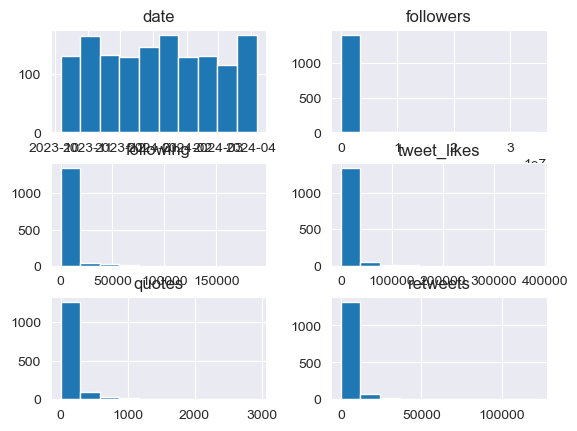

In [13]:
df.hist()

In [71]:
df_anal = pd.read_csv('analysed_df_with_countries(final2).csv')

In [72]:
df_anal

,Unnamed: 0.1,Unnamed: 0,type,date,url,text,user,user_url,user_location,followers,following,account_creation_date,tweet_likes,quotes,retweets,antisemitic_post,non_antisemitic_post,country
0,0,0,tweet,2023-10-23 10:00:02+00:00,https://twitter.com/ShaykhSulaiman/status/1716...,EXTREME CENSORSHIP - THESE SAME PEOPLE CRIED W...,ShaykhSulaiman,https://x.com/ShaykhSulaiman,UK,466037,433,23/10/2023,4286,51,1477,True,False,United Kingdom
1,1,1,tweet,2023-11-05 00:26:21+00:00,https://twitter.com/blackintheempir/status/172...,Zionism is racism and fascism on steroids,blackintheempir,https://x.com/blackintheempir,"Baltimore, MD",166044,22735,5/11/2023,2287,6,749,True,False,United States of America
2,2,2,tweet,2023-10-15 23:41:26+00:00,https://twitter.com/dancohen3000/status/171370...,Israeli “terrrorism expert” calls to carpet bo...,dancohen3000,https://x.com/dancohen3000,"Washington, DC",326535,2627,15/10/2023,748,33,406,True,False,United States of America
3,3,3,tweet,2023-11-04 04:58:06+00:00,https://twitter.com/meganshead/status/17206667...,Dear everyone who is frightened about rising a...,meganshead,https://x.com/meganshead,Cape Town,7647,2199,4/11/2023,315,7,97,True,False,South Africa
4,4,4,tweet,2023-10-27 23:46:41+00:00,https://twitter.com/NimaTavRood/status/1718051...,“Why are you pro-Palestine when you’re an athe...,NimaTavRood,https://x.com/NimaTavRood,Unknown,17184,4891,27/10/2023,165,3,25,False,True,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1413,1473,tweet,2024-03-14 15:30:54+00:00,https://twitter.com/NiohBerg/status/1768298767...,"From the River to the Sea, Palestine will neve...",NiohBerg,https://x.com/NiohBerg,Limbo,43244,1904,14/03/2024,4770,22,372,True,False,Unknown
1414,1414,1474,tweet,2024-03-16 23:32:02+00:00,https://twitter.com/AgentP22/status/1769144625...,"Sounds very like ""From the river to the sea"".\...",AgentP22,https://x.com/AgentP22,United Kingdom,52479,4045,16/03/2024,1507,19,310,False,True,United Kingdom
1415,1415,1475,tweet,2024-03-15 08:53:54+00:00,https://twitter.com/DaveAtherton20/status/1768...,"This is Hamas Leader Khaled Mashal, asked abou...",DaveAtherton20,https://x.com/DaveAtherton20,London,162270,44762,15/03/2024,131,11,84,True,False,United Kingdom
1416,1416,1476,tweet,2024-03-29 15:56:03+00:00,https://twitter.com/BurninTRanch/status/177374...,Last night 3 Presidents descended on New York ...,BurninTRanch,https://x.com/BurninTRanch,Unknown,17078,14507,29/03/2024,84,2,30,False,True,Unknown


In [16]:
import seaborn as sns

In [73]:
import matplotlib.pyplot as plt

In [74]:
df_anal.head()

,Unnamed: 0.1,Unnamed: 0,type,date,url,text,user,user_url,user_location,followers,following,account_creation_date,tweet_likes,quotes,retweets,antisemitic_post,non_antisemitic_post,country
0,0,0,tweet,2023-10-23 10:00:02+00:00,https://twitter.com/ShaykhSulaiman/status/1716...,EXTREME CENSORSHIP - THESE SAME PEOPLE CRIED W...,ShaykhSulaiman,https://x.com/ShaykhSulaiman,UK,466037,433,23/10/2023,4286,51,1477,True,False,United Kingdom
1,1,1,tweet,2023-11-05 00:26:21+00:00,https://twitter.com/blackintheempir/status/172...,Zionism is racism and fascism on steroids,blackintheempir,https://x.com/blackintheempir,"Baltimore, MD",166044,22735,5/11/2023,2287,6,749,True,False,United States of America
2,2,2,tweet,2023-10-15 23:41:26+00:00,https://twitter.com/dancohen3000/status/171370...,Israeli “terrrorism expert” calls to carpet bo...,dancohen3000,https://x.com/dancohen3000,"Washington, DC",326535,2627,15/10/2023,748,33,406,True,False,United States of America
3,3,3,tweet,2023-11-04 04:58:06+00:00,https://twitter.com/meganshead/status/17206667...,Dear everyone who is frightened about rising a...,meganshead,https://x.com/meganshead,Cape Town,7647,2199,4/11/2023,315,7,97,True,False,South Africa
4,4,4,tweet,2023-10-27 23:46:41+00:00,https://twitter.com/NimaTavRood/status/1718051...,“Why are you pro-Palestine when you’re an athe...,NimaTavRood,https://x.com/NimaTavRood,Unknown,17184,4891,27/10/2023,165,3,25,False,True,Unknown


In [75]:
df_anal.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'type', 'date', 'url', 'text', 'user',
       'user_url', 'user_location', 'followers', 'following',
       'account_creation_date', 'tweet_likes', 'quotes', 'retweets',
       'antisemitic_post', 'non_antisemitic_post', 'country'],
      dtype='object')

In [76]:
# Calculate the counts of each user location
location_counts = df_anal['country'].value_counts()

# Filter the DataFrame based on user locations that occur more than 10 times
df_anal_over_10_loc = df_anal[df_anal['country'].isin(location_counts[location_counts > 5].index)]

# Group by 'user_location' and sum the antisemitic and non-antisemitic post counts
grouped_df = df_anal_over_10_loc.groupby('country')[['antisemitic_post', 'non_antisemitic_post']].sum().reset_index()

In [77]:
grouped_df

,country,antisemitic_post,non_antisemitic_post
0,Australia,16,12
1,Canada,32,8
2,Denmark,8,4
3,Germany,8,0
4,India,7,5
5,Israel,13,22
6,Jordan,5,2
7,Palestine,13,3
8,South Africa,5,7
9,Ukraine,3,3


In [78]:
grouped_df.columns

Index(['country', 'antisemitic_post', 'non_antisemitic_post'], dtype='object')

In [79]:
filtered_grouped_df = grouped_df[grouped_df['country'] != 'Unknown'].copy()  # Make a copy to avoid modifying the original DataFrame
filtered_grouped_df['Percentage'] = 100 * filtered_grouped_df['antisemitic_post'] / (filtered_grouped_df['non_antisemitic_post'] + filtered_grouped_df['antisemitic_post'])


In [80]:
filtered_grouped_df

,country,antisemitic_post,non_antisemitic_post,Percentage
0,Australia,16,12,57.142857
1,Canada,32,8,80.000000
2,Denmark,8,4,66.666667
3,Germany,8,0,100.000000
4,India,7,5,58.333333
5,Israel,13,22,37.142857
6,Jordan,5,2,71.428571
7,Palestine,13,3,81.250000
8,South Africa,5,7,41.666667
9,Ukraine,3,3,50.000000


In [86]:
graph_data = filtered_grouped_df[['country','Percentage']]
graph_pie_chart = filtered_grouped_df[['country','antisemitic_post']]

<Figure size 1000x600 with 0 Axes>

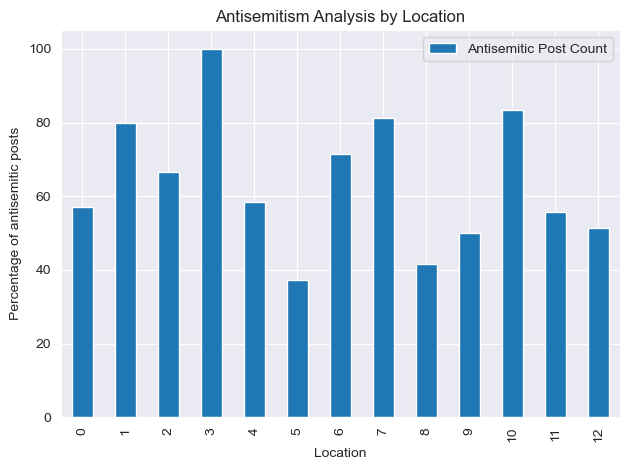

In [82]:
plt.figure(figsize=(10, 6))
graph_data.plot(kind="bar", stacked=True)
plt.title("Antisemitism Analysis by Location")
plt.xlabel("Location")
plt.ylabel("Percentage of antisemitic posts")
plt.xticks(rotation=90)
plt.legend(["Antisemitic Post Count", "Non-Antisemitic Post Count"])
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

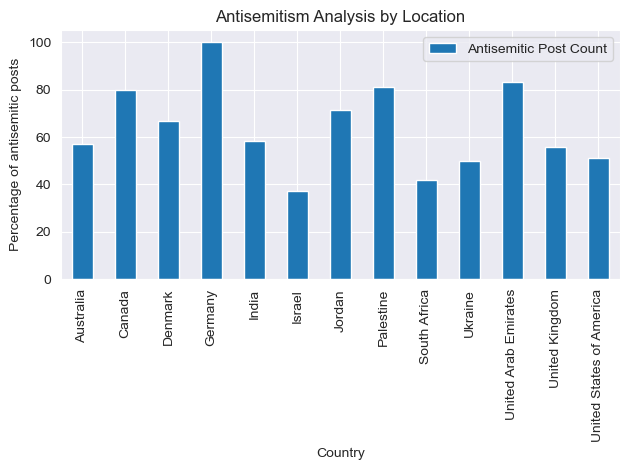

In [83]:
plt.figure(figsize=(10, 6))
graph_data.plot(kind="bar", stacked=True)
plt.title("Antisemitism Analysis by Location")
plt.xlabel("Country")
plt.ylabel("Percentage of antisemitic posts")
plt.xticks(rotation=90)
# Set country names as x-axis labels
plt.xticks(range(len(filtered_grouped_df.index)), filtered_grouped_df['country'])
plt.legend(["Antisemitic Post Count", "Non-Antisemitic Post Count"])
plt.tight_layout()
plt.show()


In [63]:
import plotly as ply

In [69]:
from plotnine import ggplot, aes, geom_bar, theme, element_text, scale_fill_manual, labs

# Assuming 'graph_data' is your DataFrame and it includes 'country' and 'Percentage' columns
# Ensure 'country' is a categorical type with an appropriate order if needed
graph_data['country'] = pd.Categorical(graph_data['country'], categories=graph_data['country'].unique(), ordered=True)

# Define a manual color scheme
color_scheme = {
    "Australia": "#1f77b4",
    "Canada": "#ff7f0e",
    "Denmark": "#2ca02c",
    # Add more countries and their corresponding colors here
}

# Create the plot
plot = (
    ggplot(graph_data, aes(x='country', y='Percentage', fill='country')) +
    geom_bar(stat='identity') +  # Use stat='identity' for pre-summarized data
    scale_fill_manual(values=color_scheme) +  # Use the manual color scheme
    theme(axis_text_x=element_text(rotation=90, hjust=1)) +  # Rotate X-axis labels for better readability
    labs(title="Antisemitism Analysis by Location", x="Country", y="Percentage of Antisemitic Tweets")
)

# Display the plot
print(plot)


ModuleNotFoundError: No module named 'plotnine'

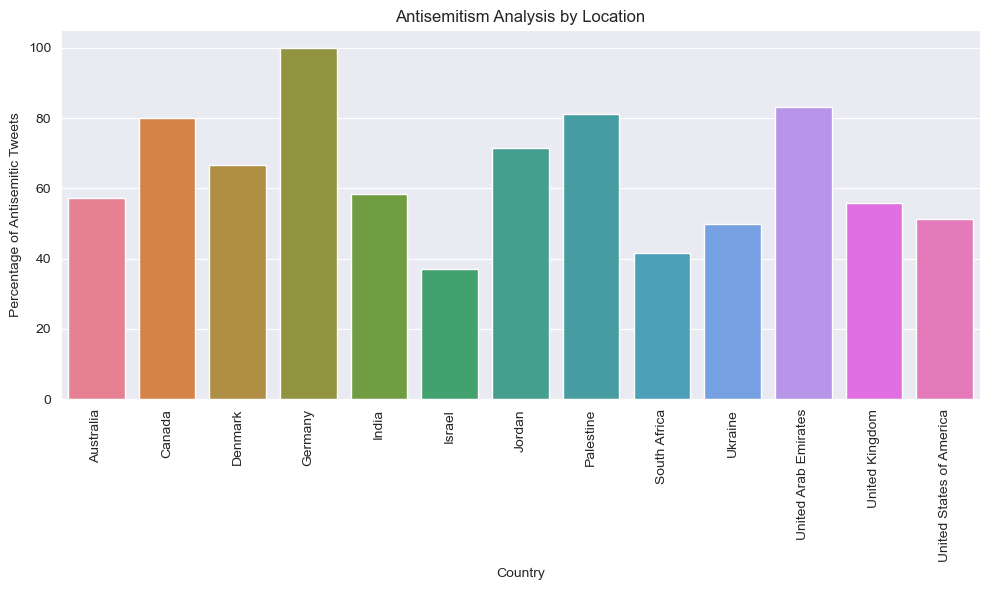

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette for each country
country_palette = sns.color_palette("husl", n_colors=len(graph_data['country'].unique()))

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=graph_data, x='country', y='Percentage', palette=country_palette)
plt.title("Antisemitism Analysis by Location")
plt.xlabel("Country")
plt.ylabel("Percentage of Antisemitic Tweets")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


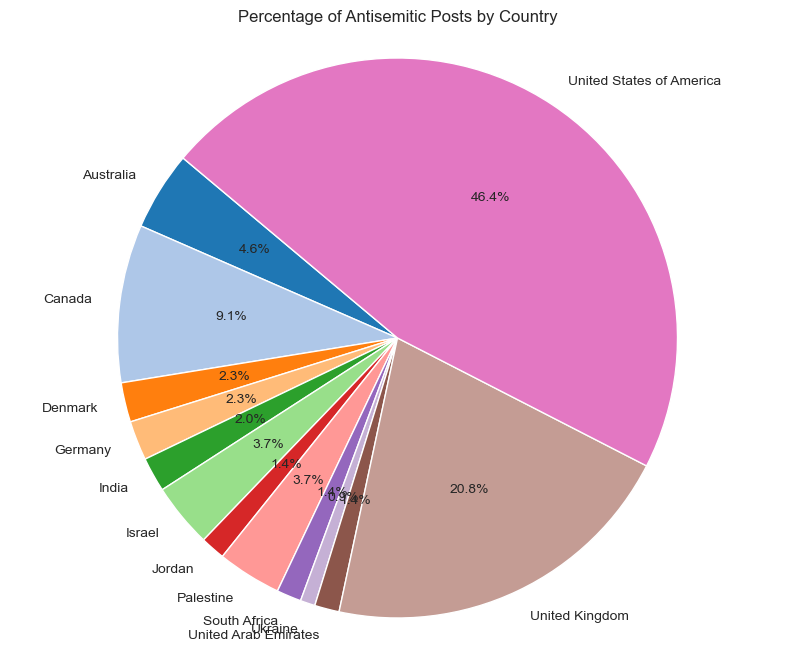

In [88]:
import matplotlib.pyplot as plt

# Assuming 'graph_data' is your DataFrame and it's already filtered to include only relevant data.
countries = graph_pie_chart['country']
percentages = graph_pie_chart['antisemitic_post']

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=countries, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Percentage of Antisemitic Posts by Country')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()
